Họ tên: Lê Hoàng Đức

MSSV: 18110075

Thực hành máy học nâng cao - 02

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization, Input
from keras import regularizers
from sklearn.model_selection import train_test_split


In [2]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()

X_train, X_test = X_train/255.0, X_test/255.0

# shape 
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(50000, 32, 32, 3) (50000, 1) (10000, 32, 32, 3) (10000, 1)


In [3]:
# split data
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.1)


In [4]:
def plot_history(history, nEpoch):
    # Plot loss and accuracy
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']

    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs_range = range(nEpoch)

    plt.figure(figsize=(15, 5))
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.tight_layout()
    plt.show()

In [5]:
def VGG16():
    model = Sequential()
    # Block 1
    model.add(Conv2D(input_shape=(32,32,3),
                     filters=64,
                     kernel_size=(3,3),
                     strides=(1,1),
                     padding='same',
                     activation='relu'))

    model.add(Conv2D(filters=64,
                     kernel_size=(3,3),
                     strides=(1,1),
                     padding='same',
                     activation='relu'))
    
    model.add(MaxPooling2D(pool_size=(2,2),
                           strides=(2,2)))
    # Block 2
    model.add(Conv2D(filters=128,
                     kernel_size=(3,3),
                     strides=(1,1),
                     padding='same',
                     activation='relu'))
    
    
    model.add(Conv2D(filters=128,
                     kernel_size=(3,3),
                     strides=(1,1),
                     padding='same',
                     activation='relu'))
    
    model.add(MaxPooling2D(pool_size=(2,2),
                           strides=(2,2)))
    # Block 3
    model.add(Conv2D(filters=256,
                     kernel_size=(3,3),
                     strides=(1,1),
                     padding='same',
                     activation='relu'))
    
    
    
    model.add(Conv2D(filters=256,
                     kernel_size=(3,3),
                     strides=(1,1),
                     padding='same',
                     activation='relu'))
    
    

    model.add(Conv2D(filters=256,
                     kernel_size=(3,3),
                     strides=(1,1),
                     padding='same',
                     activation='relu'))
    
    model.add(MaxPooling2D(pool_size=(2,2),
                           strides=(2,2)))
    # Block 4
    model.add(Conv2D(filters=512,
                     kernel_size=(3,3),
                     strides=(1,1),
                     padding='same',
                     activation='relu'))
    
    
    
    model.add(Conv2D(filters=512,
                     kernel_size=(3,3),
                     strides=(1,1),
                     padding='same',
                     activation='relu'))
    
    

    model.add(Conv2D(filters=512,
                     kernel_size=(3,3),
                     strides=(1,1),
                     padding='same',
                     activation='relu'))
    
    model.add(MaxPooling2D(pool_size=(2,2),
                           strides=(2,2)))
    # Block 5
    model.add(Conv2D(filters=512,
                     kernel_size=(3,3),
                     strides=(1,1),
                     padding='same',
                     activation='relu'))
    
    model.add(Conv2D(filters=512,
                     kernel_size=(3,3),
                     strides=(1,1),
                     padding='same',
                     activation='relu'))

    model.add(Conv2D(filters=512,
                     kernel_size=(3,3),
                     strides=(1,1),
                     padding='same',
                     activation='relu'))
    
    model.add(MaxPooling2D(pool_size=(2,2),
                           strides=(2,2)))
    # Block 6
    model.add(Flatten())
    model.add(Dense(units=4096,
                    activation='relu'))
    model.add(Dropout(0.5))

        

    model.add(Dense(units=4096,
                    activation='relu'))
    model.add(Dropout(0.5))

    model.add(Dense(units=10, 
                    activation='softmax'))
    
    return model

In [6]:
model = VGG16()
#Model Summary
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 64)        1792      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 64)        36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 128)       73856     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 128)       147584    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 128)         0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 8, 8, 256)         2

In [7]:
# HYPER PARAMETERS
lr = 5e-5
checkpoint_path = "epoch: {epoch:02d}.hdf5"
batch_size = 512
nEpoch=30

model.compile(
    loss = tf.keras.losses.sparse_categorical_crossentropy,
    optimizer= tf.keras.optimizers.Adam(learning_rate=lr),
    metrics=["accuracy"]
)

mc = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path, 
                                     monitor='val_loss',
                                     mode='min', 
                                     verbose=0,
                                     save_best_only=False)

history = model.fit(X_train, y_train,
                    batch_size=batch_size,
                    epochs=nEpoch,
                    validation_data=(X_valid, y_valid),
                    callbacks=[mc])

Epoch 1/30
88/88 [==============================] - 54s 502ms/step - loss: 2.1836 - accuracy: 0.1477 - val_loss: 2.0385 - val_accuracy: 0.1990
Epoch 2/30
88/88 [==============================] - 34s 381ms/step - loss: 1.8873 - accuracy: 0.2637 - val_loss: 1.7717 - val_accuracy: 0.3002
Epoch 3/30
88/88 [==============================] - 34s 383ms/step - loss: 1.7259 - accuracy: 0.3253 - val_loss: 1.6625 - val_accuracy: 0.3562
Epoch 4/30
88/88 [==============================] - 34s 384ms/step - loss: 1.6228 - accuracy: 0.3665 - val_loss: 1.5302 - val_accuracy: 0.4084
Epoch 5/30
88/88 [==============================] - 34s 384ms/step - loss: 1.5149 - accuracy: 0.4162 - val_loss: 1.4301 - val_accuracy: 0.4646
Epoch 6/30
88/88 [==============================] - 34s 383ms/step - loss: 1.4385 - accuracy: 0.4565 - val_loss: 1.3495 - val_accuracy: 0.4946
Epoch 7/30
88/88 [==============================] - 34s 383ms/step - loss: 1.3517 - accuracy: 0.4964 - val_loss: 1.3486 - val_accuracy: 0.4996

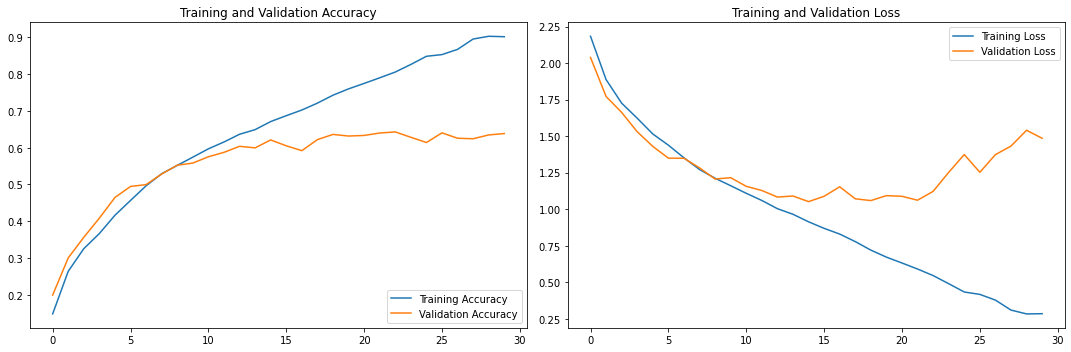

In [8]:
plot_history(history, nEpoch)

In [10]:
#Ta chọn epoch thứ 12 làm best model
model = tf.keras.models.load_model("/content/epoch: 14.hdf5")
result = model.evaluate(X_test,y_test)
print("Loss và Accuracy trên tập test là {} {}".format(result[0],result[1]))

313/313 [==============================] - 6s 20ms/step - loss: 1.0814 - accuracy: 0.6103
Loss và Accuracy trên tập test là 1.0814043283462524 0.6103000044822693


**Nhận xét**

1. Lý do ta chọn model tại epoch thứ 14 làm best model là vì dựa vào biểu đồ "Training and Validation Loss" bên trên. Ta thấy rằng, tại epoch này đường biểu diễn validation loss chuyển từ đang giảm sang có xu hướng tăng, đồng thời traning loss vẫn tiếp tục giảm. Điều này là dấu hiệu của việc model bắt đầu bị overfitting. Vì vậy việc lựa chọn mô hình tại epoch này đảm bảo sai số giữa training và testing là vừa phải khi thực hiện việc dự đoán trên tập test.
2. Tuy nhiên, với mô hình VGG16 cho tập dữ liệu Cifar10 được cài đặt như bên trên vẫn chưa thực sự phù hợp và đủ tốt. Do mô hình bị overfitting quá nặng dẫn đến độ chính xác trên tập validation lẫn tập test vẫn còn thấp. Ta có thể cải thiện mô hình bằng một số kỹ thuật như Dropout, Normalization, Regularization cho các lớp Conv2D/Fully Connected Layers v.v. Hoặc có thể điều chỉnh các thông số như số lượng hidden node ở các Fully Connected Layers sao cho độ chính xác của mô hình và loss được cải thiện hơn trên tập validation/test. 